<a href="https://colab.research.google.com/github/NataliaRussuu/data_analytics_2/blob/main/Natalia's_copy_of_COVID19_DATA_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natalia Russu. COVID 19 Data Analysis

**Description:** This script will read the latest data from the New York Times' county-level COVID-19 database at https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv, filter the data for a chosen county in a chosen state, calculate the daily count of new cases and new deaths, print the most recent 28 days' worth of data for the selected county, and save the county's data for all dates to a comma-separated value (.csv) file on your computer. The printed data can be copied and pasted directly into a spreadsheet for further analysis and visualization.

**Note:** For information about the data, see https://github.com/nytimes/covid-19-data.

**Note:** After you have run the script one time in a given Anaconda environment, you may reduce the script's execution time by adding a `#` in front of `pip install pandas`. For example, `#pip install pandas` instead of `pip install pandas`. The `#` will tell Python to skip the code without running it.

# Task 1 : Environment Set up

Import all required libraries that are needed for data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

# Task 2 :  Data Collection

Use nytimes github repository as a data source to collect the covid 19 data in real time and ingest it into colab notebook for data anlysis purpose

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-states.csv')

In [33]:
df.head(-1)

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
29158,2021-08-14,Virgin Islands,78,5242,41
29159,2021-08-14,Virginia,51,717826,11599
29160,2021-08-14,Washington,53,508631,6287
29161,2021-08-14,West Virginia,54,171997,2976


In [4]:
df.shape
# shows nr of rows and columns

(29164, 5)

In [5]:
df.columns

Index(['date', 'state', 'fips', 'cases', 'deaths'], dtype='object')

In [5]:
#df.columns displys the name of each column

# Task 3 : Data Wrangling and EDA (Exploratory Data Analysis)

Analyzing New York state data for Covid 19

In [6]:
ny_df = df[df['state']=='New York']

In [35]:
fl_df = df[df['state']=='Florida']
#I am doing in parallel for Florida, out of curiosity

In [49]:
ny_df.head(11)


,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [50]:
fl_df.head(11)

,date,state,fips,cases,deaths
242,2020-03-01,Florida,12,2,0
255,2020-03-02,Florida,12,2,0
270,2020-03-03,Florida,12,3,0
286,2020-03-04,Florida,12,3,0
304,2020-03-05,Florida,12,4,0
325,2020-03-06,Florida,12,7,2
354,2020-03-07,Florida,12,12,2
388,2020-03-08,Florida,12,13,2
423,2020-03-09,Florida,12,14,2
460,2020-03-10,Florida,12,23,2


In [8]:
ny_df.shape

(532, 5)

In [9]:
ny_df.tail()

,date,state,fips,cases,deaths
28922,2021-08-10,New York,36,2177918,53360
28977,2021-08-11,New York,36,2185142,53400
29032,2021-08-12,New York,36,2190012,53429
29087,2021-08-13,New York,36,2194646,53439
29142,2021-08-14,New York,36,2199321,53454


In [10]:
#first death in NY
first_ny_death = ny_df[ny_df['deaths']!=0]
first_ny_death.head()

,date,state,fips,cases,deaths
669,2020-03-14,New York,36,610,2
722,2020-03-15,New York,36,732,6
775,2020-03-16,New York,36,950,10
828,2020-03-17,New York,36,1375,18
882,2020-03-18,New York,36,2387,32


In [37]:
first_fl_death = fl_df[fl_df['deaths']!=0]
first_fl_death.head()

,date,state,fips,cases,deaths
325,2020-03-06,Florida,12,7,2
354,2020-03-07,Florida,12,12,2
388,2020-03-08,Florida,12,13,2
423,2020-03-09,Florida,12,14,2
460,2020-03-10,Florida,12,23,2


In [41]:
#total number of cases in NY
ny_df['cases'].max()


2199321

In [44]:
#in Florida
fl_df['cases'].max( )


2877393

In [46]:
# not a correct way of calculating total count since data is cumulative######! 
ny_df['cases'].sum()

544897883

Finding new covid 19 cases on daily basis (new cases added everyday)

In [47]:
#new cases for NY
# type(ny_df['cases'])

newcase = []
previuos_case = 0
for index, row in ny_df.iterrows():
  current_case = row['cases']
  newcase_count = current_case - previuos_case
  previuos_case = current_case
  newcase.append(newcase_count)
  # print(newcase_count)

In [48]:
ny_df['new_cases'] = newcase

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [15]:
ny_df.head(10)

,date,state,fips,cases,deaths,new_cases
246,2020-03-01,New York,36,1,0,1
261,2020-03-02,New York,36,1,0,0
276,2020-03-03,New York,36,2,0,1
293,2020-03-04,New York,36,11,0,9
313,2020-03-05,New York,36,22,0,11
338,2020-03-06,New York,36,44,0,22
369,2020-03-07,New York,36,89,0,45
404,2020-03-08,New York,36,106,0,17
440,2020-03-09,New York,36,142,0,36
478,2020-03-10,New York,36,173,0,31


In [16]:
ny_df['new_cases'].sum()

2199321

In [52]:
ny_cases = ny_df['cases']
ny_deaths = ny_df['deaths']
ny_dates = ny_df['date']
ny_new_cases = ny_df['new_cases']

print(ny_deaths)

246          0
261          0
276          0
293          0
313          0
         ...  
28922    53360
28977    53400
29032    53429
29087    53439
29142    53454
Name: deaths, Length: 532, dtype: int64


In [53]:
type(ny_new_cases)

pandas.core.series.Series

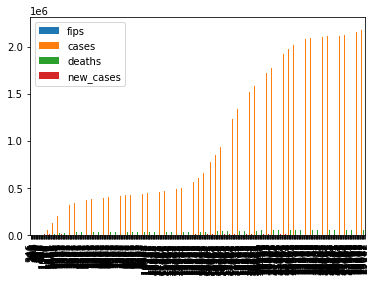

In [77]:
ny_df.plot(kind='bar')

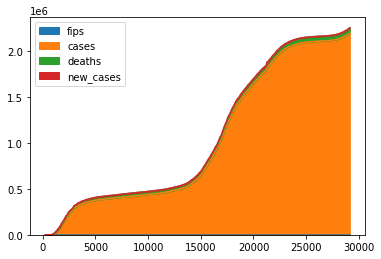

In [89]:
ny_df.plot(kind='area')


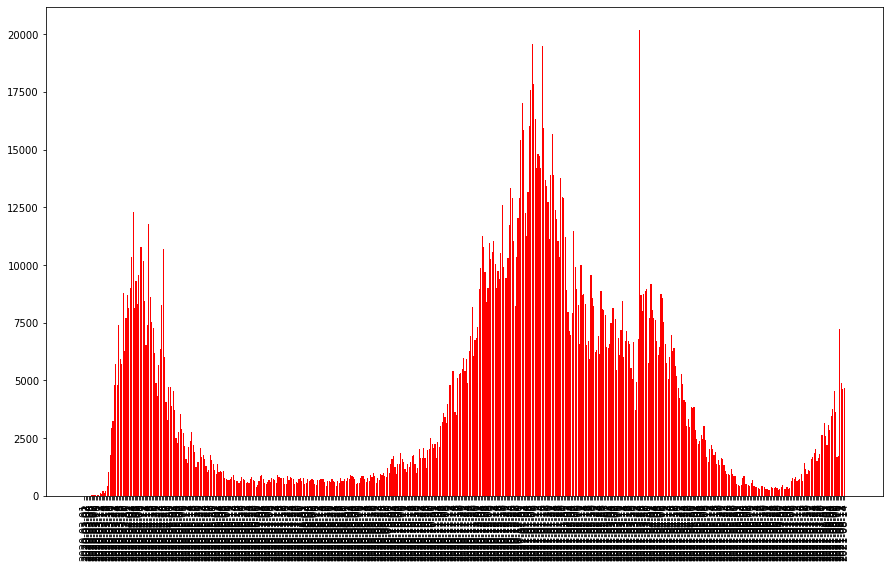

In [70]:
plt.figure(figsize=(15,9))
plt.bar(x=ny_dates, height=ny_new_cases, color='red')
plt.xticks(rotation=90)
plt.show()

# Task4: Understand NY covid 19 data in last 30 days

In [ ]:
ny_cases_30 = ny_df['cases'][-31:-1]
ny_deaths_30 = ny_df['deaths'] [-31:-1]
ny_dates_30 = ny_df['date'][-31:-1]
ny_new_cases_30 = ny_df['new_cases'][-31:-1]
print(ny_new_cases_30)

In [22]:
# ny_dates_30

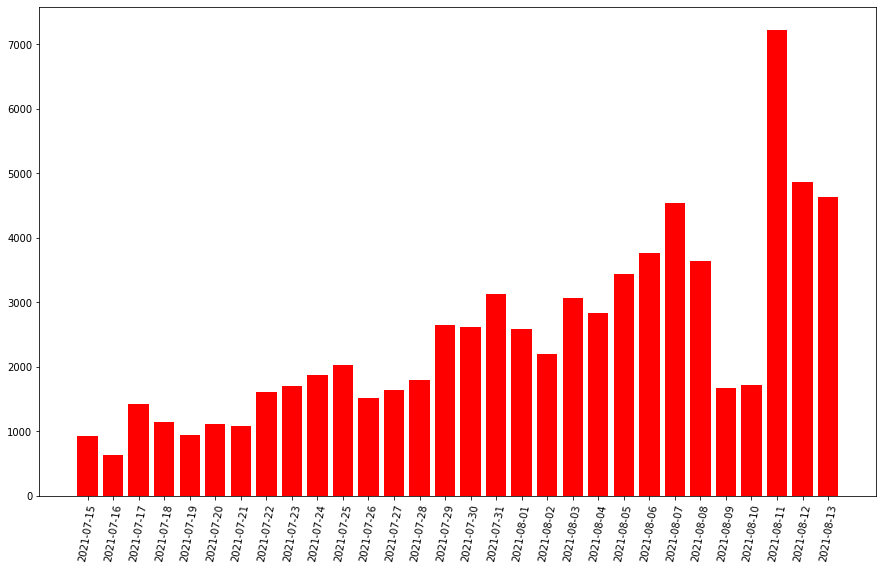

In [99]:
plt.figure(figsize=(15,9))
plt.bar(x=ny_dates_30, height=ny_new_cases_30, color='red')
plt.xticks(rotation=80)
plt.show()

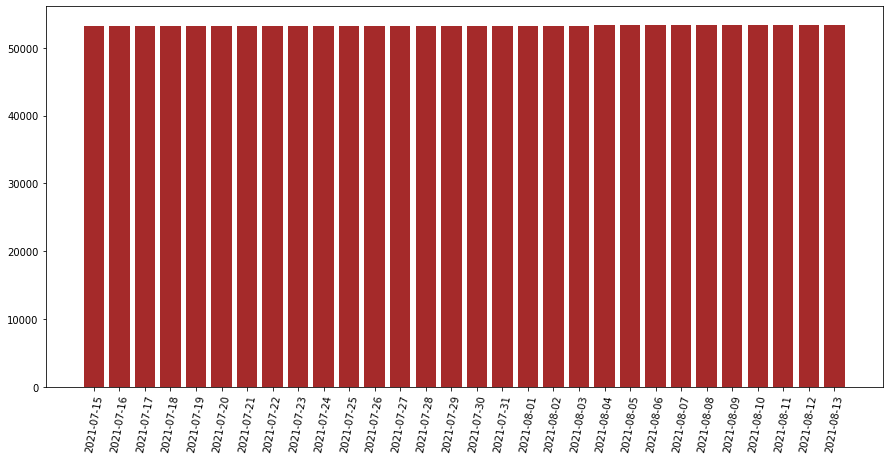

In [103]:
plt.figure(figsize=(15,7))
plt.bar(x=ny_dates_30, height=ny_deaths_30, color='brown')
plt.xticks(rotation=80)
plt.show()

# Comparing Covid 19 data with different states

Let's compare the Covid 19 cases after July for states: New York, California, Florida, Texas, Arizona

In [115]:
states = ['New York', 'California','Florida', 'Texas','Arizona']

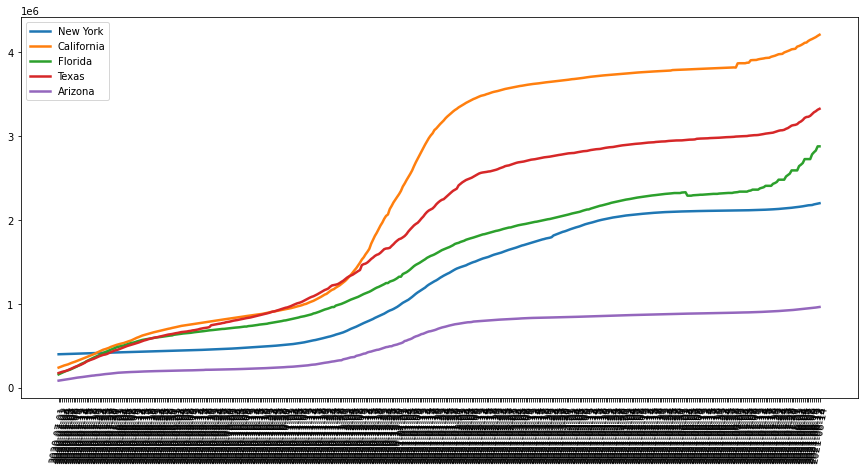

In [117]:
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-07-01')]
  plt.plot(df_st['date'],
           df_st['cases'],
           linewidth=2.5
           )
  plt.xticks(rotation=80)
plt.legend(states)
plt.show()


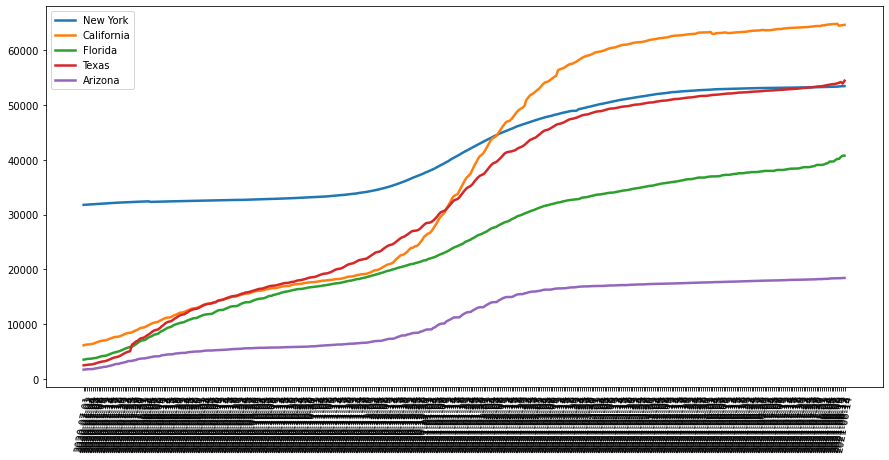

In [116]:
# comparing the deaths for the previous states, after July 2020
plt.figure(figsize=(15,7))
for state in states:
  df_st = df[(df['state']==state) & (df['date']>='2020-07-01')]
  plt.plot(df_st['date'],
           df_st['deaths'],
           linewidth=2.5
           )
  plt.xticks(rotation=80)
plt.legend(states)
plt.show()

# Conclusion

Below are the conclusions:



1.   Conclusion 1
    > Analyzing the data we see taht firts case of Covid 19 was registered in Washington state in January, 2020. As per quantitative analysis, we see that Califrornia was the most affected state,registering the most cases; after it was Texas, then FL, and NY followed - the 4 states having the higher numbers in U.S., while Arizona(out of the 5 states analyzed), had the least cases. Respectively, the proportion is the same when analyzing the deaths.
2.   Conclusion 2
     > We see a peak in March, 2020. At that time the line graph represets a suddenly increase, at a higher rate than previous periods. We conclude that in th ecold season the number of cases increase, therefore there is a direct corellation  between time period and cases. The probability of getting the virus during September - April is very high, comparing with the hot season.

